# Week 0: Introduction to Artificial Intelligence 🙌🏼

Notebook created by the UCLAIS Tutorials Team 2023/24.

Welcome to the UCLAIS Machine Learning course! Over the next few weeks, we'll be diving into the fundamentals of machine learning, exploring its applications in various fields, and equipping you with the skills to build intelligent systems. Whether you're a pro or just starting, this course is designed to cater to all levels of experience (though we will be prioritising beginners). We hope that this series can help you not only learn the fundamental skills to train models, make predictions, and code proficiently, but also enjoy doing so as you expand your knowledge in this field. This will take some time and effort, but we promise that the outcome will be incredibly rewarding as you will obtain the ability to create awesome things!

In the presentation, we went over the Turing test, questioning what it means to be a machine and a human, which led us to ask more about what is the true meaning of artificial intelligence. Intelligence can be defined as the ability to obtain knowledge, use it to reason logically, solve problems and optimise performance based on a defined metric. AI is intelligence that can be performed by a machine. This can be achieved by creating electrical systems inspired by the human brain - artificial neural networks are based on the structure of biological neural networks. AGI means artificial general intelligence, referring to intelligent machines that have human-level cognitive abilities which differs from narrow AI systems that can only do one single task specifically.

We are excited to showcase a collection of real-world examples that demonstrate the power and potential of Machine Learning (ML). Through these examples, we aim to provide you with a visual representation of what can be achieved and learned by computer programs. From image recognition systems that can accurately classify objects to natural language processing algorithms that can understand and generate human-like text, these applications highlight the incredible capabilities of ML. Witness how machines can predict customer preferences, analyze vast amounts of data for valuable insights, and even assist in medical diagnoses. These examples serve as a glimpse into the boundless possibilities of ML and inspire us to explore its ever-expanding horizons.




In [1]:
import pandas as pd
import numpy as np

import torch
from torchvision import datasets
from torchvision import transforms
from torchvision import models as pretrained_models

import torch.nn.functional as F

from matplotlib import pyplot as plt

%matplotlib inline

# Example Machine Learning Code

We demonstrate the power of Machine Learning by showing some example code. Do not worry about trying to understand the details of this. However, hopefully, by the end of these tutorials, you're able to understand what this program is doing, and maybe even implement some of the algorithms yourself.

Housekeeping:
* We recommend you run this notebook in Google Colab for consistent results.
* Before running the notebook make sure to change runtime type to GPU: "Runtime" -> "Change runtime type" -> "Hardware accelerator" -> "GPU"



## Example 1: Image Classification

Credits: This section was modified from UCL's COMP0169 module lead by Professor Niloy Mitra.

In [2]:
def predict(test_loader, model, classes, scale=1):
    """
    This function will be used to predict using the trained neural network
    'model', and evaluate classification accuracy and show example images
    that are classified.

    Arguments:
    test_loader : Pytorch data loader. We iterate over this to obtain samples
    model : The neural network model object
    classes : The names of the classes
    """

    # Move model to GPU
    model = model.cuda()

    # No gradients, since we're evaluating and not training
    with torch.no_grad():
        model.eval()
        correct = 0

        # Iterate over the dataset
        for data, target in test_loader:
            # Data and its corresponding labels
            data, target = data.cuda(), target.cuda()

            # Predicted labels, using the model
            predictions = model(data)

            # Evaluate accuracy by comparing prediction to target
            predictions_index = predictions.data.max(1, keepdim=True)[
                1
            ]  # get the index of the max log-probability
            correct += (
                predictions_index.eq(target.view_as(predictions_index))
                .long()
                .cpu()
                .sum()
            )

    print(
        "\nTest set accuracy: {}/{} ({:.0f}%)\n".format(
            correct,
            len(test_loader.dataset),
            100.0 * correct / len(test_loader.dataset),
        )
    )

    # Show some of the images.
    plt.figure()
    for i in range(data.size(0)):
        if data[i].size(0) == 3:
            pred = torch.unsqueeze(data[i].cpu(), 0)
            resized = F.interpolate(pred, scale_factor=scale, mode="bicubic")
            plt.imshow(resized[0].permute(1, 2, 0).clip(0, 1))
        else:
            plt.imshow(data[i].permute(1, 2, 0).cpu().squeeze().clip(0, 1), cmap="gray")
        plt.show()

        # Print predicted output
        print(f"Predicted class: {classes[predictions_index[i]]}", end="\n\n")

In [3]:
# Initialize the dataset. Apply transformation to each image
cifar_data = datasets.CIFAR10(
    "../data",
    train=False,
    download=True,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
    ),
)

# Initialize torch data loader using initialized dataset
cifar_test_loader = torch.utils.data.DataLoader(cifar_data, batch_size=5, shuffle=False)

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

100%|██████████| 170498071/170498071 [00:13<00:00, 12537049.78it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data


In [4]:
"""
A pre-trained model available in Pytorch is VGG-16. We'll predict CIFAR-10 classes with that.
"""

vgg16 = pretrained_models.vgg16()
vgg16.classifier[6] = torch.nn.Linear(4096, 10)

# Get and load pre-trained weights into pytorch's VGG-16
!wget "http://geometry.cs.ucl.ac.uk/mlvc/week2_session_weights/cifar10_net.pth" -O 'cifar10_net.pth'
vgg16.load_state_dict(torch.load("cifar10_net.pth"))

--2023-10-03 13:44:17--  http://geometry.cs.ucl.ac.uk/mlvc/week2_session_weights/cifar10_net.pth
Resolving geometry.cs.ucl.ac.uk (geometry.cs.ucl.ac.uk)... 128.16.15.132
Connecting to geometry.cs.ucl.ac.uk (geometry.cs.ucl.ac.uk)|128.16.15.132|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://geometry.cs.ucl.ac.uk/group_website/mlvc/week2_session_weights/cifar10_net.pth [following]
--2023-10-03 13:44:18--  https://geometry.cs.ucl.ac.uk/group_website/mlvc/week2_session_weights/cifar10_net.pth
Connecting to geometry.cs.ucl.ac.uk (geometry.cs.ucl.ac.uk)|128.16.15.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 537217935 (512M)
Saving to: ‘cifar10_net.pth’

cifar10_net.pth     100%[===================>] 512.33M  3.79MB/s    in 2m 25s  

2023-10-03 13:46:44 (3.52 MB/s) - ‘cifar10_net.pth’ saved [537217935/537217935]



<All keys matched successfully>


Test set accuracy: 8493/10000 (85%)



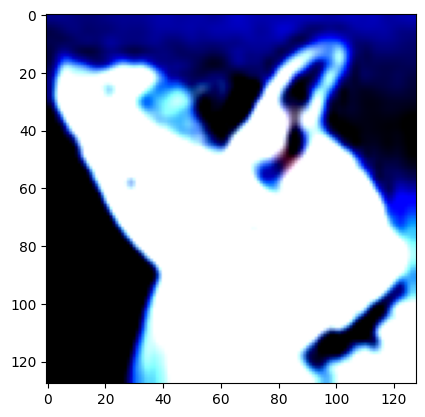

Predicted class: ship



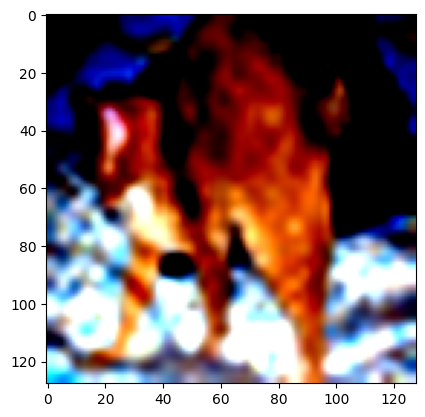

Predicted class: cat



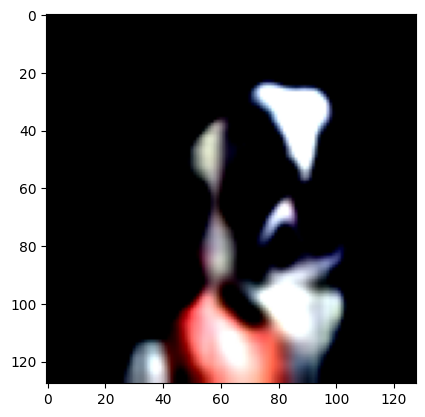

Predicted class: dog



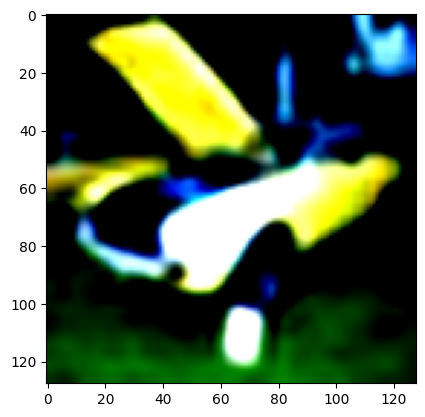

Predicted class: car



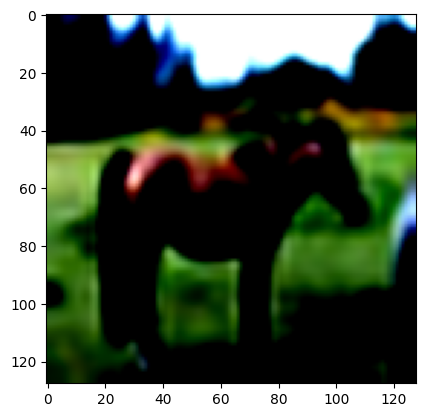

Predicted class: horse



In [5]:
# Predict CIFAR-10 classes using VGG-16
predict(cifar_test_loader, vgg16, classes, scale=4)

## Example 2: Semantic Text Search

Credits: Inpired by sample code on [OpenAI's Cookbook](https://github.com/openai/openai-cookbook/tree/main) repository.

In [6]:
# Import openai api
!pip install openai
import openai
from openai.embeddings_utils import get_embedding, cosine_similarity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 1.3 MB/s eta 0:00:00


Here we keep the `openai.api_key` as `""`, but feel free to add your own secret key which you can get from your [account](https://platform.openai.com/account/api-keys).

In [7]:
openai.api_key = ""  # Please add your OpenAI API Key if you want to rerun this cell! https://platform.openai.com/account/api-keys

We now download our data. These are Amazon food reviews. The "Summary" column gives the title of the review and "Text" the actual review. While the embedding column is that embedding passed through openai's embedding model. Essentially, we map the review description to a vector.

In [8]:
# Get and load sample food review data into pandas dataframe (embeddings already generated)
!wget https: // raw.githubusercontent.com/openai/openai-cookbook/main/examples/data/fine_food_reviews_with_embeddings_1k.csv -O fine_food_reviews_with_embeddings_1k.csv
df = pd.read_csv("fine_food_reviews_with_embeddings_1k.csv")
df["embedding"] = df.embedding.apply(eval).apply(np.array)
df[["Score", "Summary", "Text", "embedding"]].head()

--2023-10-03 13:47:19--  ftp://https/
           => ‘.listing’
Resolving https (https)... failed: Name or service not known.
wget: unable to resolve host address ‘https’
//: Scheme missing.
--2023-10-03 13:47:19--  http://raw.githubusercontent.com/openai/openai-cookbook/main/examples/data/fine_food_reviews_with_embeddings_1k.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/openai/openai-cookbook/main/examples/data/fine_food_reviews_with_embeddings_1k.csv [following]
--2023-10-03 13:47:19--  https://raw.githubusercontent.com/openai/openai-cookbook/main/examples/data/fine_food_reviews_with_embeddings_1k.csv
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.

,Score,Summary,Text,embedding
0,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,"[0.007018072064965963, -0.02731654793024063, 0..."
1,4,"Good, but not Wolfgang Puck good","Honestly, I have to admit that I expected a li...","[-0.003140551969408989, -0.009995664469897747,..."
2,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...","[-0.01757248118519783, -8.266511576948687e-05,..."
3,5,Best tomato soup,I have a hard time finding packaged food of an...,"[-0.0013932279543951154, -0.011112828738987446..."
4,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...","[-0.01757248118519783, -8.266511576948687e-05,..."


The embeddings column (vectors) allows us to see how closely related two pieces of text are. Here we can create a function to see top n closest related food reviews to a search phrase.

In [9]:
# search through the reviews for a specific product
def search_reviews(df, product_description, n=3, pprint=True):
    product_embedding = get_embedding(
        product_description, engine="text-embedding-ada-002"
    )
    df["similarity"] = df.embedding.apply(
        lambda x: cosine_similarity(x, product_embedding)
    )

    results = (
        df.sort_values("similarity", ascending=False)
        .head(n)
        .combined.str.replace("Title: ", "")
        .str.replace("; Content:", ": ")
    )
    if pprint:
        for r in results:
            print(r[:200])
            print()
    return results

This result of this are extremely powerful! In the example below, we use the search phrase "In bad state", and it gives us the result below. None of these keywords are in the review themselves. However, it understands the semantics (ideas) of this search phrase and finds the best results for those.

We can use AI to make very powerful search engines!

In [10]:
results = search_reviews(df, "In bad state", n=2)

Arrived in pieces:  Not pleased at all. When I opened the box, most of the rings were broken in pieces. A total waste of money.

Disappointed:  The metal cover has severely disformed. And most of the cookies inside have been crushed into small pieces. Shopping experience is awful. I'll never buy it online again.



In [11]:
results = search_reviews(df, "delicious beans", n=3)

Good Buy:  I liked the beans. They were vacuum sealed, plump and moist. Would recommend them for any use. I personally split and stuck them in some vodka to make vanilla extract. Yum!

Jamaican Blue beans:  Excellent coffee bean for roasting. Our family just purchased another 5 pounds for more roasting. Plenty of flavor and mild on acidity when roasted to a dark brown bean and befor

Delicious!:  I enjoy this white beans seasoning, it gives a rich flavor to the beans I just love it, my mother in law didn't know about this Zatarain's brand and now she is traying different seasoning



In [12]:
results = search_reviews(df, "whole wheat pasta", n=3)

Tasty and Quick Pasta:  Barilla Whole Grain Fusilli with Vegetable Marinara is tasty and has an excellent chunky vegetable marinara.  I just wish there was more of it.  If you aren't starving or on a 

sooo good:  tastes so good. Worth the money. My boyfriend hates wheat pasta and LOVES this. cooks fast tastes great.I love this brand and started buying more of their pastas. Bulk is best.

Handy:  Love the idea of ready in a minute pasta and for that alone this product gets praise.  The pasta is whole grain so that's a big plus and it actually comes out al dente.  The vegetable marinara



In [13]:
results = search_reviews(df, "bad delivery", n=1)

great product, poor delivery:  The coffee is excellent and I am a repeat buyer.  Problem this time was with the UPS delivery.  They left the box in front of my garage door in the middle of the drivewa



In [14]:
results = search_reviews(df, "pet food", n=2)

Good food:  The only dry food my queen cat will eat. Helps prevent hair balls. Good packaging. Arrives promptly. Recommended by a friend who sells pet food.

The cats like it:  My 7 cats like this food but it is a little yucky for the human. Pieces of mackerel swimming in a dark broth. It is billed as a "complete" food and contains carrots, peas and pasta.

